#  Covid-19 trend forecasting in LSTM model

In this jupyter notebook, we will assess the ability of LSTM model in Covid-19 forecasting. 

This forecasting work based on the WHO Coronavirus Disease (COVID-19) Dashboard (27/09/2020)
https://covid19.who.int/

There are 4 countries for our target, including Australia, China, Italy and US

Previously we have complete the data extraction from original sources, and now we are going to load these dataset and do further processing.

# 1. proprecessing

## 1.1 Data loading

In [1]:
import IPython
import IPython.display
from tensorflow import keras

In [2]:
import os,glob
import pandas as pd
import numpy as np
data_all = pd.read_csv(r"D:\Download\COVID19\WHO-COVID-19-global-data.csv", index_col=None)

In [3]:
data_all.columns = data_all.columns.str.replace(' ', '')

In [4]:
data_all.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63215 entries, 0 to 63214
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      63215 non-null  object
 1   Country_code       62946 non-null  object
 2   Country            63215 non-null  object
 3   WHO_region         63215 non-null  object
 4   New_cases          63215 non-null  int64 
 5   Cumulative_cases   63215 non-null  int64 
 6   New_deaths         63215 non-null  int64 
 7   Cumulative_deaths  63215 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.9+ MB


In [6]:
data_all.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,63215.000000,6.321500e+04,63215.000000,63215.000000
mean,517.771810,3.651005e+04,15.680202,1474.109990
std,3788.950602,2.725697e+05,108.257858,9350.207733
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,1.450000e+02,0.000000,2.000000
75%,57.000000,3.906000e+03,1.000000,78.000000
max,97894.000000,6.960152e+06,6409.000000,202478.000000


In [7]:
site_cn = data_all[['Date_reported',"New_cases"]][data_all.Country == "China"]
site_cn_group =  site_cn.groupby(['Date_reported'],as_index=False).sum()
site_cn_group.rename(columns={"New_cases":"NC_cn_24h"}, inplace=True)
site_cn_group

,Date_reported,NC_cn_24h
0,2020-01-03,0
1,2020-01-04,1
2,2020-01-05,0
3,2020-01-06,3
4,2020-01-07,0
...,...,...
264,2020-09-23,18
265,2020-09-24,10
266,2020-09-25,15
267,2020-09-26,18


In [8]:
site_au = data_all[['Date_reported',"New_cases"]][data_all.Country == "Australia"]
site_au_group =  site_au.groupby(['Date_reported'],as_index=False).sum()
site_au_group.rename(columns={"New_cases":"NC_au_24h"}, inplace=True)
site_au_group

,Date_reported,NC_au_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,30
265,2020-09-24,31
266,2020-09-25,10
267,2020-09-26,17


In [9]:
site_it = data_all[['Date_reported',"New_cases"]][data_all.Country == "Italy"]
site_it_group =  site_it.groupby(['Date_reported'],as_index=False).sum()
site_it_group.rename(columns={"New_cases":"NC_it_24h"}, inplace=True)
site_it_group

,Date_reported,NC_it_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,1391
265,2020-09-24,1640
266,2020-09-25,1786
267,2020-09-26,1912


In [10]:
site_us = data_all[['Date_reported',"New_cases"]][data_all.Country == "United States of America"]
site_us_group =  site_us.groupby(['Date_reported'],as_index=False).sum()
site_us_group.rename(columns={"New_cases":"NC_us_24h"}, inplace=True)
site_us_group

,Date_reported,NC_us_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,39145
265,2020-09-24,49176
266,2020-09-25,40043
267,2020-09-26,41254


In [11]:
all_data_df = site_cn_group.merge(site_au_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_it_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_us_group, left_on='Date_reported', right_on='Date_reported')

In [12]:
all_data_df

,Date_reported,NC_cn_24h,NC_au_24h,NC_it_24h,NC_us_24h
0,2020-01-03,0,0,0,0
1,2020-01-04,1,0,0,0
2,2020-01-05,0,0,0,0
3,2020-01-06,3,0,0,0
4,2020-01-07,0,0,0,0
...,...,...,...,...,...
264,2020-09-23,18,30,1391,39145
265,2020-09-24,10,31,1640,49176
266,2020-09-25,15,10,1786,40043
267,2020-09-26,18,17,1912,41254


In [13]:
all_data_df.to_csv(r'D:\Download\COVID19\data\WHO-COVID-19-global-data.csv', index = False, header=True)

Before the process, we need to make sure the data has frequency attributes.

## 1.2 frequence check

In [14]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

~~~~~~~~~~~~
Next we want to extract date time

~~~~~~~~~~~~

In [15]:
df_time = all_data_df.copy()
date_time = pd.to_datetime(df_time.pop('Date_reported'), format='%Y-%m-%d %H:%M:%S')

In [16]:
date_time

0     2020-01-03
1     2020-01-04
2     2020-01-05
3     2020-01-06
4     2020-01-07
         ...    
264   2020-09-23
265   2020-09-24
266   2020-09-25
267   2020-09-26
268   2020-09-27
Name: Date_reported, Length: 269, dtype: datetime64[ns]

In [17]:
df_time.head()

,NC_cn_24h,NC_au_24h,NC_it_24h,NC_us_24h
0,0,0,0,0
1,1,0,0,0
2,0,0,0,0
3,3,0,0,0
4,0,0,0,0


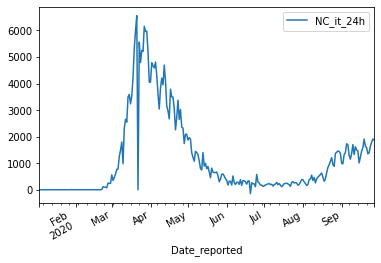

In [18]:
plot_cols = ['NC_it_24h']
plot_features = df_time[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

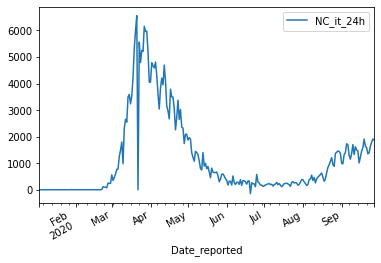

In [19]:
plot_features = df_time[plot_cols][:365]
plot_features.index = date_time[:365]
_ = plot_features.plot(subplots=True)

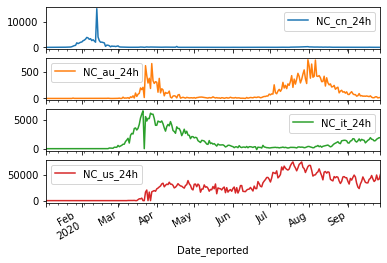

In [20]:
plot_cols = ['NC_cn_24h','NC_au_24h','NC_it_24h','NC_us_24h']
plot_features = df_time[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

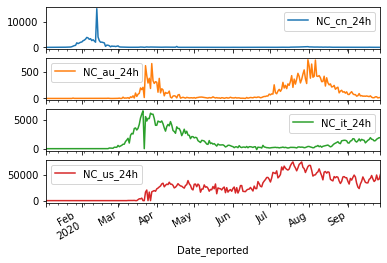

In [21]:
plot_features = df_time[plot_cols][:365]
plot_features.index = date_time[:365]
_ = plot_features.plot(subplots=True)

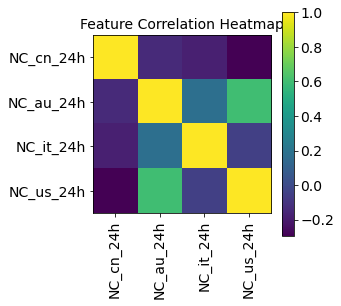

In [22]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df_time[plot_cols])

# 2. Problem formulation and modelling

## Forecasting the trend of death and infection cases of COVID-19

### Data preparation

# USA

In [23]:
selected_features = ['NC_us_24h']
date_time_key = "Date_reported"
features = all_data_df[selected_features]
features.index = all_data_df["Date_reported"]
features.head()

,NC_us_24h
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0


### Normalization and data set split

We will have 70% days as training,20% days as validation.

Note the data is **not** being randomly shuffled before splitting. This is for two reasons.

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.



In [24]:
train_fraction = 0.7
test_fraction = 0.9

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

In [25]:
def normalize(data, train_split):
    n = len(data)
    data_mean = data[:int(n*train_split)].mean(axis=0)
    data_std = data[:int(n*train_split)].std(axis=0)
    print(data_mean)
    print(data_std)
    return (data - data_mean) / data_std


In [26]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

[15550.17021277]
[15086.76888065]


,0
0,-1.030716
1,-1.030716
2,-1.030716
3,-1.030716
4,-1.030716


In [27]:
n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

val case until: 188 test case until:  242


# test_data, LearningRate 0.05, Epochs 1000

In [28]:
step = 1
past = 25
future = 5
learning_rate = 0.05
batch_size = 30
epochs = 1000

In [29]:
start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

start: 30  end: 218


In [30]:
x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


In [31]:
sequence_length = int(past / step)
print(sequence_length)

25


In [32]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


In [33]:
val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)

start: 188  end: 242


In [34]:

temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

array([[2.30087901],
       [3.25317039],
       [2.87833864],
       [3.36260403],
       [3.10330397],
       [2.95376897],
       [2.86143641],
       [2.99340635],
       [3.42119842],
       [3.70747575],
       [3.89770866],
       [3.4078092 ],
       [3.13107665],
       [2.7657234 ],
       [3.14042259],
       [3.58531573],
       [3.7227209 ],
       [3.88982096],
       [3.20929088],
       [3.04557127],
       [2.55003772],
       [2.92168788],
       [3.30460619],
       [3.46481279],
       [3.44333702],
       [2.83943037],
       [2.09672661],
       [2.22717204],
       [2.25885543],
       [2.5070199 ],
       [2.63594081],
       [3.01441814],
       [2.54148719],
       [2.14849383],
       [1.61358804],
       [2.60100954],
       [2.67498164],
       [2.46897332],
       [2.63865842],
       [2.57343571],
       [1.69173598],
       [1.56261622],
       [1.48194951],
       [2.03548089],
       [1.88256545],
       [2.0156622 ],
       [1.94845099],
       [1.472

In [35]:
y_val

,0
218,2.635941
219,3.014418
220,2.541487
221,2.148494
222,1.613588
223,2.601010
224,2.674982
225,2.468973
226,2.638658
227,2.573436


In [36]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [37]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (30, 25, 1)
Target shape: (30, 1)


### model and training

In this section we will setup our model using LSTM unit.

In [38]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [39]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 1.7628
Epoch 00001: val_loss improved from inf to 0.98065, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 69ms/step - loss: 1.7628 - val_loss: 0.9807
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 2.1147
Epoch 00002: val_loss did not improve from 0.98065
6/6 [==============================] - 0s 16ms/step - loss: 2.8198 - val_loss: 2.1808
Epoch 3/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.4335
Epoch 00003: val_loss did not improve from 0.98065
6/6 [==============================] - 0s 15ms/step - loss: 1.2714 - val_loss: 2.7438
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.2713
Epoch 00004: val_loss improved from 0.98065 to 0.39937, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.5357 - val_loss: 0.3994
Epoch 5/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1114

### Evaluation

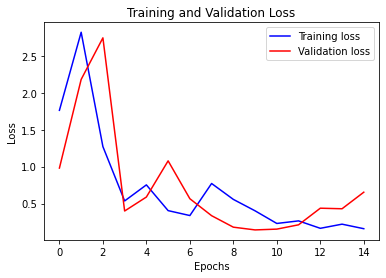

In [40]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
visualize_loss(history, "Training and Validation Loss")

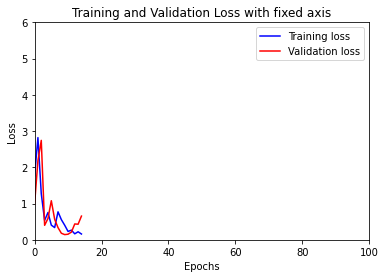

In [41]:
def visualize_loss_fixed_axis(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.axis([0, 100, 0, 6])
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show() 
    
visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

### Prediction

In [42]:
#x_test = test_data.iloc[:1424][[i for i in range(7)]]
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

In [43]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

In [44]:
def re_normalize(data, train_split,y):
    n = len(data)
    data_mean = data[:int(n*train_split)].mean(axis=0)
    data_std = data[:int(n*train_split)].std(axis=0)
    print(data_mean[0])
    print(data_std[0])
    return y * data_std[0] + data_mean[0]


In [45]:
features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 
print(y_hat.size)
y_data = pd.DataFrame(y_hat)
print(y_data)

15550.170212765957
15086.768880653724
27
               0
0   29124.332031
1   26207.720703
2   31743.662109
3   30274.322266
4   32530.056641
5   34218.417969
6   32840.914062
7   27189.386719
8   22430.919922
9   20397.089844
10  26315.410156
11  29154.958984
12  32908.109375
13  30614.154297
14  28129.378906
15  27542.472656
16  27523.996094
17  30921.238281
18  31724.855469
19  33919.855469
20  31323.986328
21  28969.310547
22  30151.794922
23  34233.687500
24  30575.593750
25  31128.115234
26  34531.714844


In [46]:
dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i    
print(dict_index)
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'}) 
print(y_data.size)
result = pd.concat([features, y_data], axis=1, join='outer')
print(result)
print(features)

{0: 268, 1: 269, 2: 270, 3: 271, 4: 272, 5: 273, 6: 274, 7: 275, 8: 276, 9: 277, 10: 278, 11: 279, 12: 280, 13: 281, 14: 282, 15: 283, 16: 284, 17: 285, 18: 286, 19: 287, 20: 288, 21: 289, 22: 290, 23: 291, 24: 292, 25: 293, 26: 294}
27
     NC_us_24h    prediction
0          0.0           NaN
1          0.0           NaN
2          0.0           NaN
3          0.0           NaN
4          0.0           NaN
..         ...           ...
290        NaN  30151.794922
291        NaN  34233.687500
292        NaN  30575.593750
293        NaN  31128.115234
294        NaN  34531.714844

[295 rows x 2 columns]
     NC_us_24h
0            0
1            0
2            0
3            0
4            0
..         ...
264      39145
265      49176
266      40043
267      41254
268      50070

[269 rows x 1 columns]


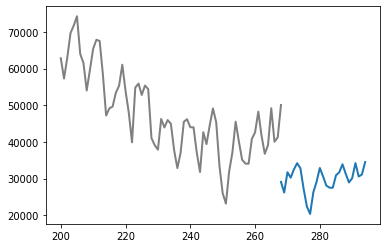

In [47]:
plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_us_24h'], linewidth=2, markersize=12,color='grey')